In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [95]:
X=[]
Z=[]
IMG_SIZE=150
normal_folder = "/content/drive/MyDrive/CHEST XRAY IMAGES/dataset/normal"
covid_folder = "/content/drive/MyDrive/CHEST XRAY IMAGES/dataset/covid"

In [96]:
def assign_label(img,type_data):
    return type_data

In [97]:
def make_train_data(type_data,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,type_data)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [98]:
make_train_data('Covid',covid_folder)
print(len(X))

100%|██████████| 69/69 [00:12<00:00,  5.67it/s]

69


In [99]:
make_train_data('Normal',normal_folder)
print(len(X))

100%|██████████| 25/25 [00:07<00:00,  3.56it/s]

94


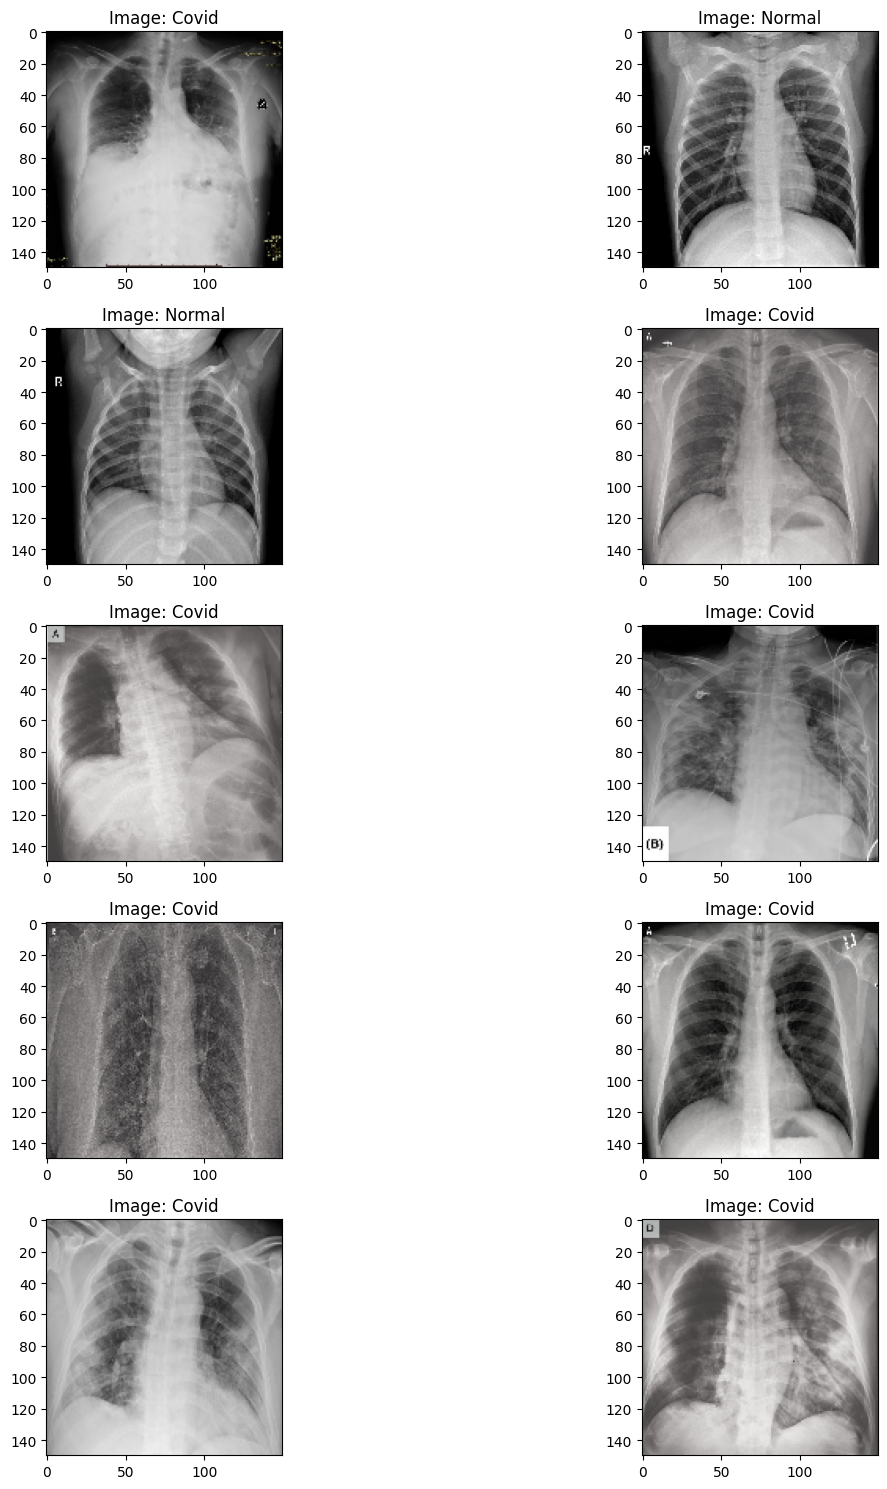

In [100]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Image: '+Z[l])

plt.tight_layout()

In [101]:
import keras.utils
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=keras.utils.to_categorical(Y, num_classes=2)
X=np.array(X)
X=X/255

In [110]:
height, width, channels = X[0].shape

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [112]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes (normal and covid)
])

In [113]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [114]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 8s 2s/step - loss: 6.4757 - accuracy: 0.7333 - val_loss: 6.8235 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 2s 994ms/step - loss: 2.1190 - accuracy: 0.7667 - val_loss: 1.7718 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 2s 976ms/step - loss: 1.5008 - accuracy: 0.2667 - val_loss: 0.5190 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 2s 968ms/step - loss: 0.5059 - accuracy: 0.7333 - val_loss: 0.9244 - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 2s 959ms/step - loss: 0.5406 - accuracy: 0.7333 - val_loss: 0.6012 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 2s 1s/step - loss: 0.3796 - accuracy: 0.7333 - val_loss: 0.4820 - val_accuracy: 0.7333
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 0.3577 - accuracy: 0.9500 - val_loss: 0.4843 - val_accuracy: 0.7333
Epoch 8/10
2/2 [=============

In [116]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 0s 348ms/step - loss: 0.0896 - accuracy: 1.0000
Test accuracy: 1.0
